In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import KFold

In [68]:
# df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
print(df.head())
print(df.shape)
df = df.dropna()
print(df.shape)

labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

          0         1         2         3         4         5         6  \
0  1.113858  1.108510  1.102847  1.096870  1.090579  1.083975  1.077059   
1  0.064043  0.055604  0.046810  0.037668  0.028185  0.018368  0.008224   
2  5.118280  5.120856  5.123157  5.125185  5.126939  5.128421  5.129629   
3  0.124127  0.127284  0.130182  0.132823  0.135208  0.137336  0.139209   
4  2.737924  2.761422  2.784723  2.807828  2.830736  2.853449  2.875967   

          7         8         9  ...     17991     17992     17993     17994  \
0  1.069830  1.062289  1.054437  ... -3.871177 -3.853297 -3.837668 -3.824290   
1 -0.002237 -0.013005 -0.024072  ... -2.581886 -2.562567 -2.545505 -2.530700   
2  5.130564  5.131227  5.131617  ... -1.426081 -1.408760 -1.393671 -1.380814   
3  0.140828  0.142193  0.143305  ... -4.037542 -4.020208 -4.005101 -3.992223   
4  2.898290  2.920418  2.942353  ... -2.404540 -2.386731 -2.371153 -2.357807   

      17995     17996     17997     17998     17999  labels  
0 -3.8

In [69]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\DAMS\PycharmProjects\MasterThesis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\DAMS\PycharmProjects\MasterThesis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

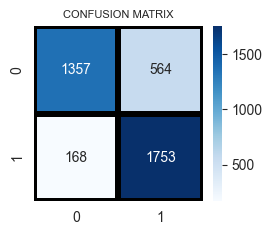

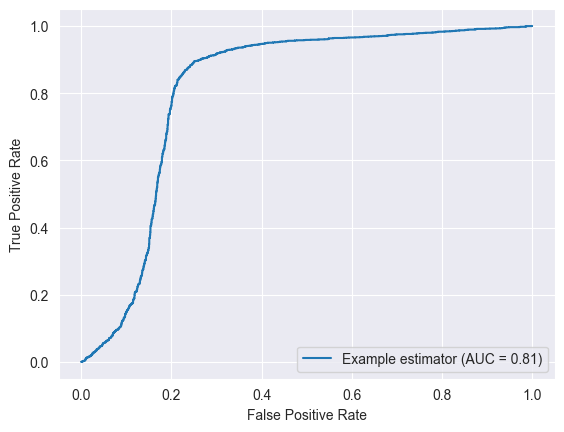

Average Accuracy: 80.9479843073593%
Average AUC: 0.8111369741587799


In [71]:
# Setting up the KFold parameters
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

accuracy_list = []
roc_auc_list = []
# Lists to store predictions and true labels
y_true_global = []
y_pred_global = []
y_pred_prob_global = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    y_true_global.extend(y_test)
    y_pred_global.extend(predictions)
    y_pred_prob_global.extend(y_pred_prob)

avg_accuracy = sum(accuracy_list) / n_splits
avg_roc_auc = sum(roc_auc_list) / n_splits
#Confusion matrix
plt.figure(figsize=(6, 5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_true_global, y_pred_global), annot=True, cmap="Blues", fmt="d", linecolor="k",
            linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=8)
# ROC curve
fpr, tpr, _ = roc_curve(y_true_global, y_pred_prob_global)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()
print(f"Average Accuracy: {avg_accuracy*100}%")
print(f"Average AUC: {avg_roc_auc}")

In [72]:
CROSS_VALIDATION = True

if not CROSS_VALIDATION:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # tworzenie modelu
    model = LogisticRegression(max_iter=1000)
    # trenowanie modelu
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # sprawdzanie dokładności modelu
    accuracy = accuracy_score(y_test, predictions)

    print(f"Accuracy: {accuracy*100}%")
    #Confusion matrix
    plt.figure(figsize=(6,5))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=8)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
    display.plot()
    plt.show()